In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import sklearn
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

# Load and Visualize Data

In [2]:
data = pd.read_csv("../src/data/diabetes_dataset.csv")

In [3]:
data.shape

(2000, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


### Attributes with Missing Value Counts

In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Exploration and Visualization

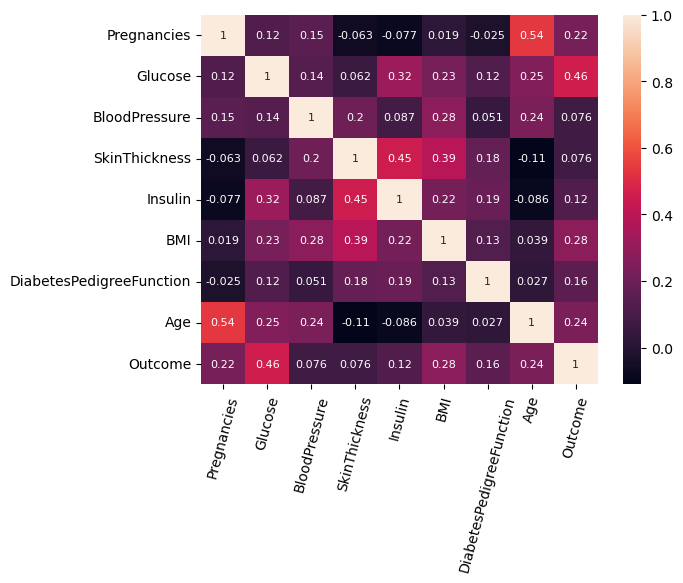

In [8]:
sns.heatmap(data.corr(), annot=True, annot_kws={"size": 8})
plt.xticks(rotation=75);

In [9]:
data.Outcome.value_counts()

0    1316
1     684
Name: Outcome, dtype: int64

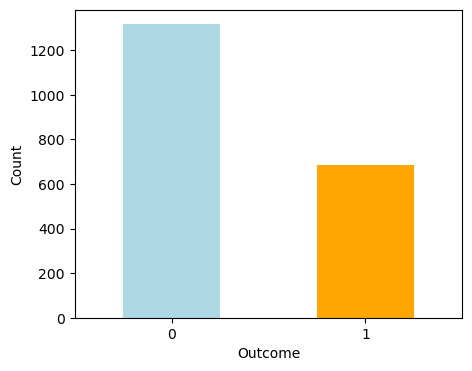

In [10]:
plt.figure(figsize=(5, 4))
data['Outcome'].value_counts().sort_index().plot(kind='bar', color=['lightblue', 'orange'])
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

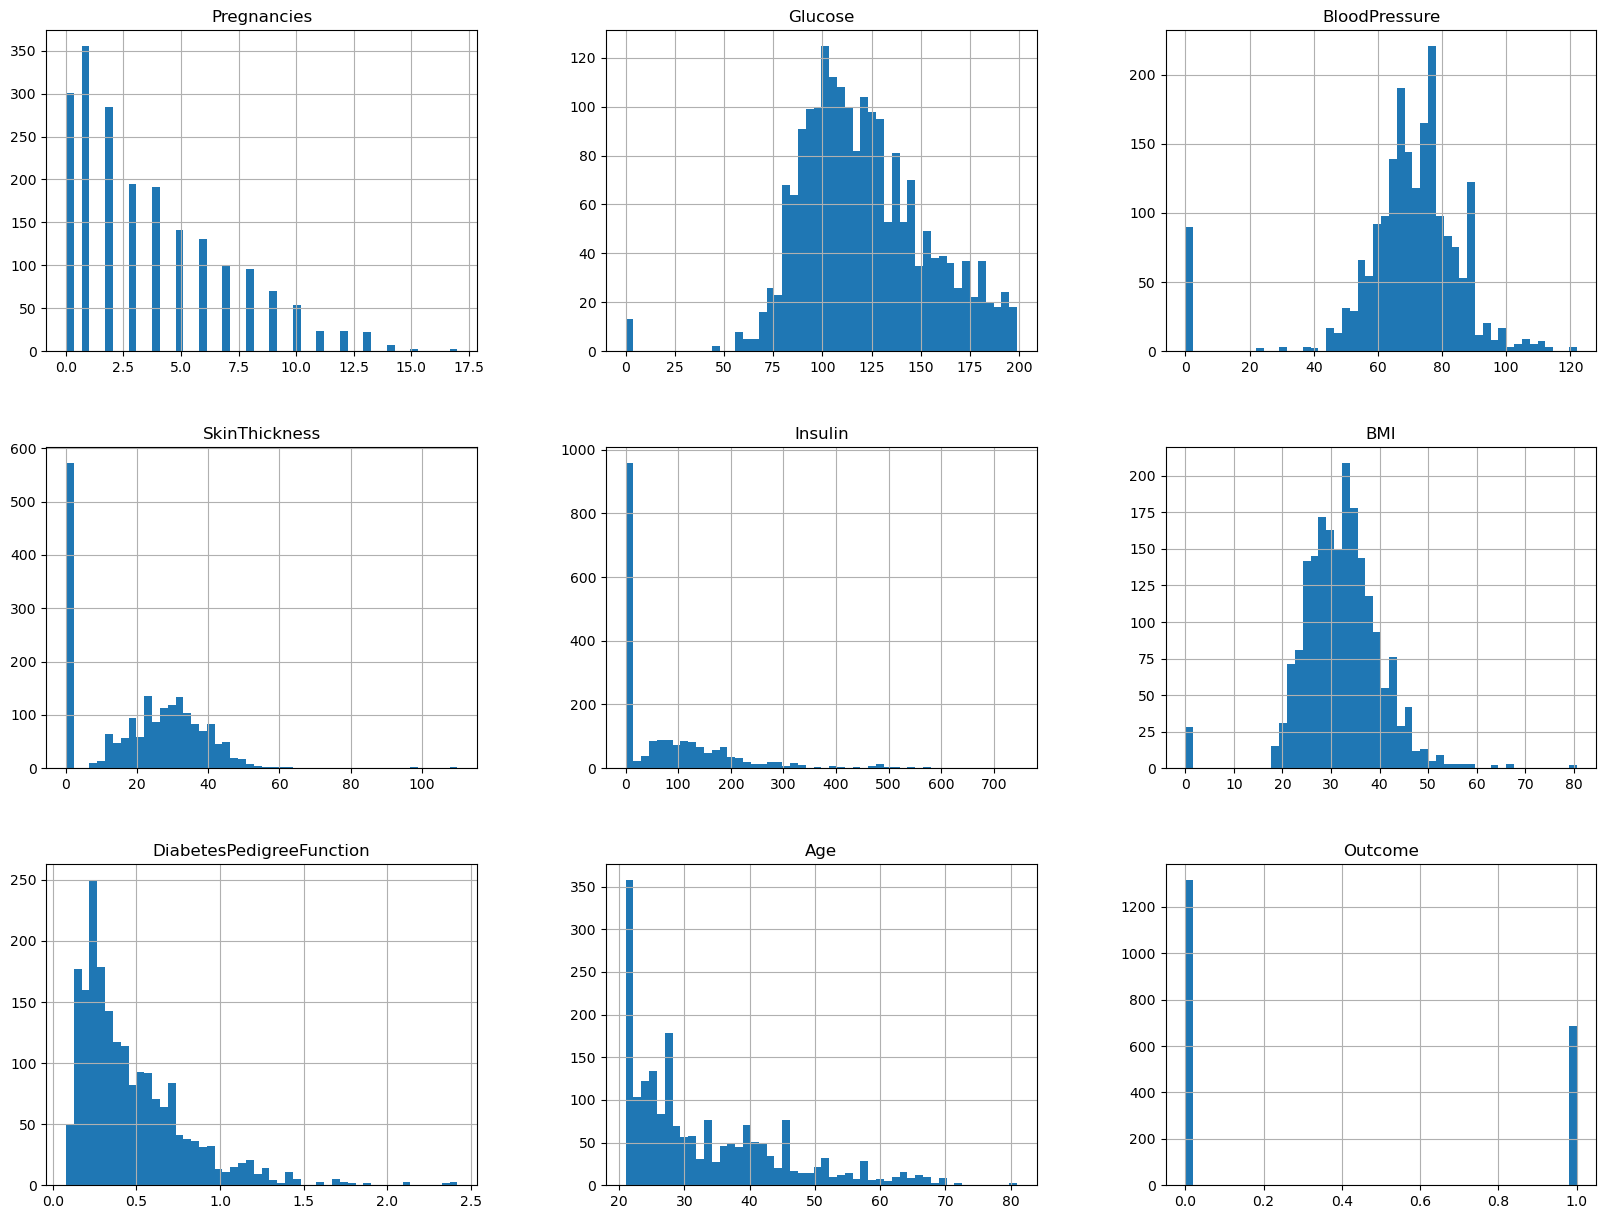

In [11]:
data.hist(bins=50, figsize=(20,15));

### Attributes with Zero Values

In [12]:
#Zero missing values
df = data.drop(columns='Outcome')
(df == 0).sum()

Pregnancies                 301
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

### Impute Missing Data

In [13]:
X = data.drop(columns='Outcome')
y = data['Outcome']
print(X.shape)
print(y.shape)

(2000, 8)
(2000,)


In [14]:
# Create a simple imputer to fill in zero values with mean value of attribute
imputer = SimpleImputer(missing_values=0, strategy='mean')
imputer.fit(X)
X = pd.DataFrame(data=imputer.transform(X), columns = X.columns)

In [15]:
# There are no zero values after imputing
(X==0).sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [16]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2.000000,138.0,62.000000,35.000000,153.743295,33.6,0.127,47.0
1,4.359623,84.0,82.000000,31.000000,125.000000,38.2,0.233,23.0
2,4.359623,145.0,72.403665,29.341275,153.743295,44.2,0.630,31.0
3,4.359623,135.0,68.000000,42.000000,250.000000,42.3,0.365,24.0
4,1.000000,139.0,62.000000,41.000000,480.000000,40.7,0.536,21.0


In [17]:
X = X.copy()
X.loc[:,'Outcome'] = y

### Correlation Matrix after Handling Attributes with Zero Values

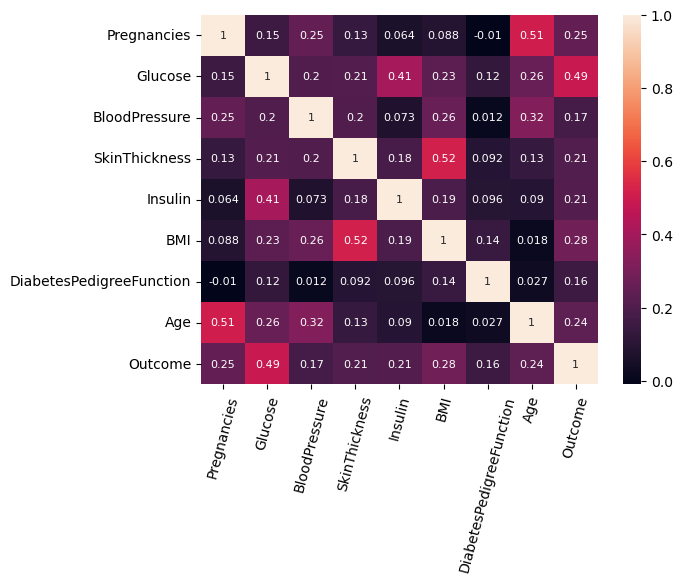

In [18]:
sns.heatmap(X.corr(), annot=True, annot_kws={"size": 8})
plt.xticks(rotation=75);

### Feature Selection

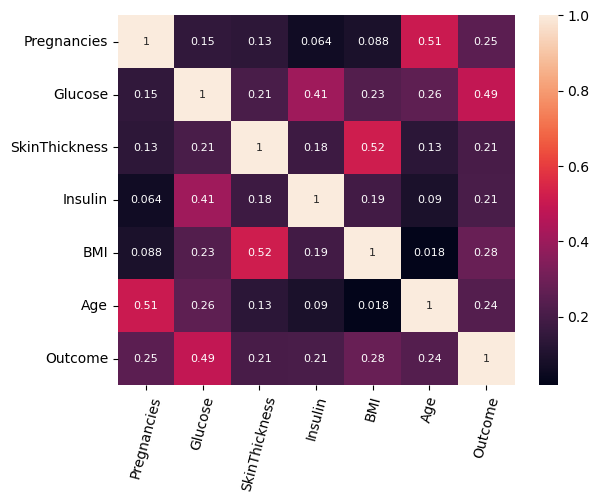

In [19]:
# Dropping all attributes/features by placing a cut-off value as 0.2
X = X.drop(columns=['BloodPressure', 'DiabetesPedigreeFunction'])
sns.heatmap(X.corr(), annot=True, annot_kws={"size": 8})
plt.xticks(rotation=75);

### Data Standardization

In [20]:
X = X.drop(columns=['Outcome']).values
y = y.values
print(X.shape)
print(y.shape)

(2000, 6)
(2000,)


In [21]:
scaler = StandardScaler()

In [22]:
X_scaled = scaler.fit_transform(X)

In [23]:
print("\nBefore Scaling:\n")
print("Mean:", np.mean(X, axis=0))

print("\nAfter Scaling:\n")
print("Mean:", np.mean(X_scaled, axis=0))


Before Scaling:

Mean: [  4.35962331 121.97533971  29.3412754  153.74329502  32.65010142
  33.0905    ]

After Scaling:

Mean: [-1.28785871e-16  2.84217094e-17  2.59348099e-16 -2.55795385e-16
 -1.17239551e-16  1.13686838e-16]


### Data Splitting

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size= 0.30, stratify= y, random_state=10)

In [25]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1400, 6)
(1400,)
(600, 6)
(600,)


In [26]:
y_train = y_train.reshape(-1,1)

print(y_train.shape)

(1400, 1)


In [27]:
model = LogisticRegression()

In [28]:
model.fit(X_train, y_train.ravel())

LogisticRegression()

In [29]:
pred = model.predict(X_test)
print('Logistic Regression model accuracy: ', accuracy_score(y_test, pred))

Logistic Regression model accuracy:  0.7683333333333333


In [30]:
conf_matrix = confusion_matrix(y_test, pred)
print('Confusion Matrix:\n',conf_matrix)

Confusion Matrix:
 [[347  48]
 [ 91 114]]


In [31]:
precision = precision_score(y_test, pred, average='binary') 
print('Precision:',precision)

Precision: 0.7037037037037037


In [32]:
recall = recall_score(y_test, pred, average='binary')
print('Recall:',recall)

Recall: 0.5560975609756098


In [33]:
f1_score = f1_score(y_test, pred, average='binary')
print('F1_score:',f1_score)

F1_score: 0.6212534059945505
